# Hospitationsprotokoll
Dies ist ein Hospitationsprotokoll, basierend auf den Daten die von meiner Software (verfügbar unter https://github.com/MrCactus753/Classroom_Conversation_Measurer) gesammelt wurden. Zuerst zeige ich wie die Rohdaten gesammelt wurden, und anschließend lege ich die erhobenen Daten dar und werte sie aus. Hierbei werden sowohl die Operationen im Hintergrund angegeben, als auch Beschreibungen hierfür gegeben.

## Initialisierung / Darstellung der Grunddaten:

In [1]:
import pandas as pd #importiert benötigte Module
import matplotlib.pyplot as plt #importiert benötigte Module

raw_data = pd.read_csv('15_10_19_08_45.csv').round(2)#importiert die Datei
nicer_data= raw_data.pivot(columns = 'role', values = 'time spoken')#spaltet / sortiert die Tabelle
dimensions =raw_data.shape
length = dimensions[0]-1
students = nicer_data['student'].dropna().sort_values().reset_index().drop(columns=['index'])#schönere Formattierung
teacher = nicer_data['teacher'].dropna().sort_values().reset_index().drop(columns=['index'])#schönere Formattierung
nobody = nicer_data['nobody'].dropna().sort_values().reset_index().drop(columns=['index'])#schönere Formattierung
raw_data# Dient lediglich der Darstellung der Daten


,role,time spoken
0,student,1.80
1,teacher,31.99
2,teacher,18.13
3,student,6.29
4,teacher,30.51
5,student,2.70
6,teacher,9.62
7,student,1.92
8,teacher,16.61
9,student,1.15


Damit die Daten verwendet werden können, muss zuerst die betreffende .csv-Datei geladen und zur weiteren Verarbeitung vorbereitet werden. Hierzu wird die Rohdatei in mehrere Unterlisten unterteilt damit die Daten ersichtlicher sind. Dies resultiert in der folgenden (sortierten) Tabelle (NaN = leeres Feld):

In [2]:
sorted_data = pd.concat([students,teacher,nobody], axis=1)
sorted_data


,student,teacher,nobody
0,0.61,0.63,7.05
1,0.71,1.35,8.70
2,0.76,1.57,47.20
3,1.15,2.10,125.77
4,1.22,2.13,138.41
5,1.23,2.51,304.73
6,1.29,2.78,NaN
7,1.40,2.82,NaN
8,1.43,5.52,NaN
9,1.46,5.84,NaN


## Auswertung der Daten
Im nächsten Schritt, müssen die Daten ausgewertet werden um verständlich dargestellt zu werden. Hierbei werden mehrere Metriken verwendet. In erster Linie wird das Verhältnis zwischen den Redeanteilen von Schüler_innen und der Lehrperson dargestellt, gefolgt von der Darstellung der durchschnittlichen Redezeit.

In [3]:
solutions = pd.DataFrame({
    'Schüler':[students.sum(axis = 0),students.mean(),((students.sum()/raw_data.loc[length].at['time spoken'])*100)], 
    'Lehrer':[teacher.sum(), teacher.mean(),(teacher.sum()/raw_data.loc[length].at['time spoken'])*100],
    'Ruhe':[nobody.sum(),nobody.mean(),(nobody.sum()/raw_data.loc[length].at['time spoken'])*100]}, 
    index = ['Gesamte Zeit in Sekunden','Durchschnittliche Dauer in Sekunden', 'Anteil in Prozent'])
solutions

,Schüler,Lehrer,Ruhe
Gesamte Zeit in Sekunden,student 143.66 dtype: float64,teacher 614.64 dtype: float64,nobody 631.86 dtype: float64
Durchschnittliche Dauer in Sekunden,student 5.320741 dtype: float64,teacher 17.561143 dtype: float64,nobody 105.31 dtype: float64
Anteil in Prozent,student 9.385494 dtype: float64,teacher 40.155227 dtype: float64,nobody 41.280232 dtype: float64


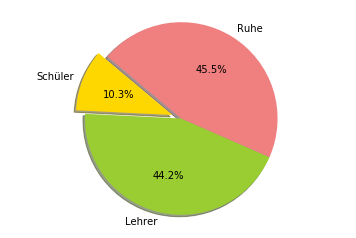

In [4]:
# Data to plot
labels = 'Schüler', 'Lehrer', 'Ruhe'
sizes = [(students.sum()/1530.65678)*100,(teacher.sum()/1530.65678)*100,(nobody.sum()/1530.65678)*100]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode = explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

## Kreation eines Häufigkeitshistograms

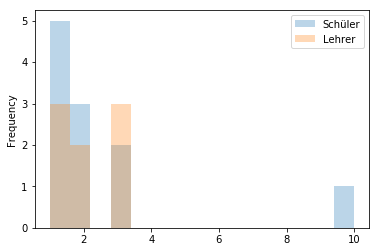

In [5]:
frequency_students = sorted_data['student'].round(0).value_counts()
frequency_teacher = sorted_data['teacher'].round(0).value_counts()
graph = pd.DataFrame()
graph['Schüler'] = frequency_students
graph['Lehrer'] = frequency_teacher
ax = graph.plot.hist(bins=15, alpha=0.3)